In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Airline_review_original.csv')

# Dropping first two column of entry ID and airline_name
df = df.iloc[:, 2:]

df.head()

,Overall_Rating,Review_Title,Review Date,Verified,Review,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended
0,9,"""pretty decent airline""",11th November 2019,True,Moroni to Moheli. Turned out to be a pretty ...,NaN,Solo Leisure,Economy Class,Moroni to Moheli,Nov-19,4.0,5.0,4.0,4.0,NaN,NaN,3.0,yes
1,1,"""Not a good airline""",25th June 2019,True,Moroni to Anjouan. It is a very small airline...,E120,Solo Leisure,Economy Class,Moroni to Anjouan,Jun-19,2.0,2.0,1.0,1.0,NaN,NaN,2.0,no
2,1,"""flight was fortunately short""",25th June 2019,True,Anjouan to Dzaoudzi. A very small airline an...,Embraer E120,Solo Leisure,Economy Class,Anjouan to Dzaoudzi,Jun-19,2.0,1.0,1.0,1.0,NaN,NaN,2.0,no
3,1,"""I will never fly again with Adria""",28th September 2019,False,Please do a favor yourself and do not fly wi...,NaN,Solo Leisure,Economy Class,Frankfurt to Pristina,Sep-19,1.0,1.0,NaN,1.0,NaN,NaN,1.0,no
4,1,"""it ruined our last days of holidays""",24th September 2019,True,Do not book a flight with this airline! My fr...,NaN,Couple Leisure,Economy Class,Sofia to Amsterdam via Ljubljana,Sep-19,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no


In [ ]:
df.isna().sum()

Overall_Rating                0
Review_Title                  0
Review Date                   0
Verified                      0
Review                        0
Aircraft                  16042
Type Of Traveller          3738
Seat Type                  1096
Route                      3828
Date Flown                 3754
Seat Comfort               4155
Cabin Staff Service        4260
Food & Beverages           8671
Ground Service             4793
Inflight Entertainment    12342
Wifi & Connectivity       17251
Value For Money            1066
Recommended                   0
dtype: int64

In [ ]:
#Compute the percentage for each traveller type

# Replace empty and None values with "Other Type of Travellers"
df['Type Of Traveller'].fillna('Other Type of Travellers', inplace=True)

# Count the occurrences of each type of traveller
traveler_counts = df['Type Of Traveller'].value_counts()

# Calculate the percentage for each type of traveller
total_travelers = len(df)
traveler_percentages = (traveler_counts / total_travelers) * 100

# Create a DataFrame to display the results
result_df = pd.DataFrame({'Type of Traveller': traveler_counts.index, 'Count': traveler_counts.values, 'Percentage': traveler_percentages.values})
print(result_df)

          Type of Traveller  Count  Percentage
0              Solo Leisure   7120   30.728065
1            Couple Leisure   5265   22.722368
2            Family Leisure   4352   18.782098
3  Other Type of Travellers   3738   16.132234
4                  Business   2696   11.635234


In [ ]:
#Compute the percents of Verified and Non-Verified travelers for each type of travelers

#Count the occurrences of each type of traveler and verification status
traveler_group = df.groupby(['Type Of Traveller', 'Verified']).size().unstack(fill_value=0)

# Calculate the percentage for each type of traveler
traveler_percent = (traveler_group.div(traveler_group.sum(axis=1), axis=0) * 100).reset_index()

print(traveler_percent)

Verified         Type Of Traveller      False       True
0                         Business  33.531157  66.468843
1                   Couple Leisure  40.512821  59.487179
2                   Family Leisure  41.245404  58.754596
3         Other Type of Travellers  99.973248   0.026752
4                     Solo Leisure  32.022472  67.977528


In [ ]:
# Dropping [Aircraft. Verfied, Route, Overall_Rating] since it has no value to our research
df.drop('Aircraft', axis=1, inplace=True)
df.drop('Verified', axis=1, inplace=True)
df.drop('Route', axis=1, inplace=True)
df.drop('Overall_Rating', axis=1, inplace=True)

# Dropping 'Date Flown' as well as we assume 'Date Flown' and 'Review Date' to be in the same timeframe, hence keeping only one
df.drop('Date Flown', axis=1, inplace=True)

# Replacing nan values across the individual ratings columns with same scales
columns_to_fill = ['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 
                   'Ground Service', 'Inflight Entertainment', 
                   'Wifi & Connectivity', 'Value For Money']

for column in columns_to_fill:
    df[column].fillna(int(df[column].mean()), inplace=True)

# Creating a new column that sums up the individual ratings
df['Total Score'] = df[columns_to_fill].sum(axis=1)

# As we are only interested in pre and post-covid, we will segregate into before-2020 and post-2020 (incl 2020)
# a. Dropping rows if the 'Review Date' column value is empty
df = df.dropna(subset=['Review Date'])

# b. Split the column by comma (',')
df['Review Date'] = df['Review Date'].str.split(' ').str[2]

# c. Convert to datetime
df['Review Date'] = pd.to_datetime(df['Review Date'], format='%Y')

# d. Separate the pre-covid and post-covid into two new data frames
pre_covid = df[df['Review Date'].dt.year < 2020]
post_covid = df[df['Review Date'].dt.year >= 2020]

pre_covid.head()

,Review_Title,Review Date,Review,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score
0,"""pretty decent airline""",2019-01-01,Moroni to Moheli. Turned out to be a pretty ...,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,23.0
1,"""Not a good airline""",2019-01-01,Moroni to Anjouan. It is a very small airline...,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,11.0
2,"""flight was fortunately short""",2019-01-01,Anjouan to Dzaoudzi. A very small airline an...,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,10.0
3,"""I will never fly again with Adria""",2019-01-01,Please do a favor yourself and do not fly wi...,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,9.0
4,"""it ruined our last days of holidays""",2019-01-01,Do not book a flight with this airline! My fr...,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0


In [ ]:
print("Total rows in Pre-Covid Dataframe:")
print(pre_covid.shape[0])
print("Total rows in Post-Covid Dataframe:")
print(post_covid.shape[0])

Total rows in Pre-Covid Dataframe:
11428
Total rows in Post-Covid Dataframe:
11743


In [ ]:
# Compute summary statistics for pre and post covid
print(pre_covid['Total Score'].describe())
print()
print(post_covid['Total Score'].describe())

count    11428.000000
mean        16.157158
std          6.652429
min          3.000000
25%         11.000000
50%         15.000000
75%         21.000000
max         35.000000
Name: Total Score, dtype: float64

count    11743.000000
mean        14.977519
std          7.311138
min          5.000000
25%          9.000000
50%         12.000000
75%         20.000000
max         35.000000
Name: Total Score, dtype: float64


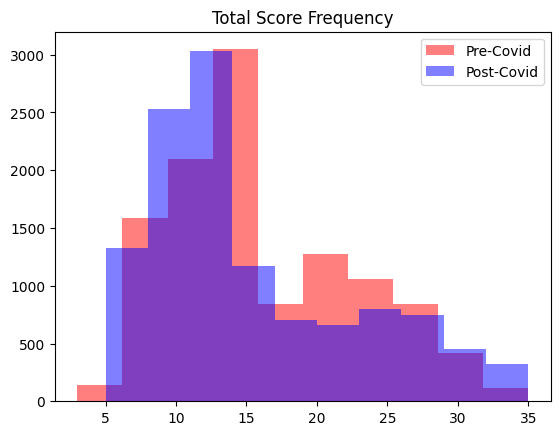

In [ ]:
# Plot a histogram to see the trend of total score before and after covid preference
plt.hist(pre_covid[["Total Score"]], alpha=0.5, label='Pre-Covid', color='red')
plt.hist(post_covid[["Total Score"]], alpha=0.5, label='Post-Covid', color='blue')

plt.title('Total Score Frequency')
plt.legend()
plt.show()

Seat Comfort and Cabin Staff Service have a correlation coefficient of 0.77
Seat Comfort and Food & Beverages have a correlation coefficient of 0.67
Seat Comfort and Ground Service have a correlation coefficient of 0.64
Seat Comfort and Inflight Entertainment have a correlation coefficient of 0.42
Seat Comfort and Wifi & Connectivity have a correlation coefficient of 0.20
Seat Comfort and Value For Money have a correlation coefficient of 0.69
Seat Comfort and Total Score have a correlation coefficient of 0.86
Cabin Staff Service and Food & Beverages have a correlation coefficient of 0.72
Cabin Staff Service and Ground Service have a correlation coefficient of 0.66
Cabin Staff Service and Inflight Entertainment have a correlation coefficient of 0.40
Cabin Staff Service and Wifi & Connectivity have a correlation coefficient of 0.19
Cabin Staff Service and Value For Money have a correlation coefficient of 0.70
Cabin Staff Service and Total Score have a correlation coefficient of 0.88
Food

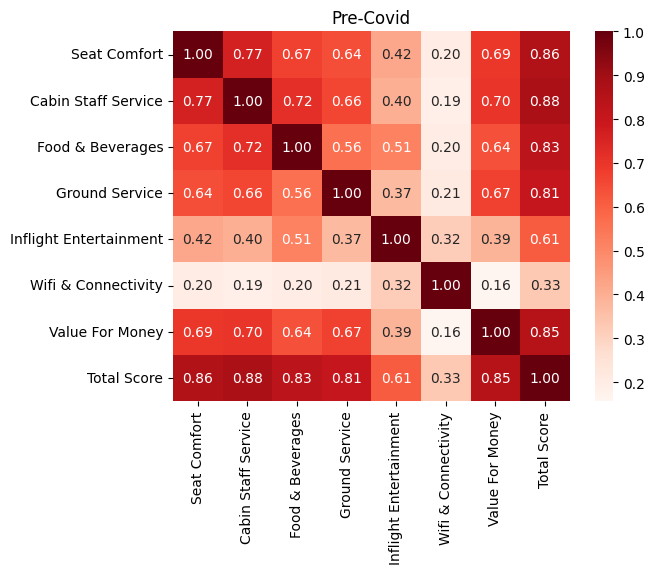

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = pre_covid.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Reds", annot=True, fmt=".2f")

# Get the names of the columns
columns = corr.columns

# Iterate through the correlation matrix
for i in range(len(columns) - 1):
    for j in range(i+1, len(columns)):  # Avoid duplicates and the diagonal
        col1 = columns[i]
        col2 = columns[j]
        correlation_coefficient = corr.iloc[i, j]
        print(f'{col1} and {col2} have a correlation coefficient of {correlation_coefficient:.2f}')

plt.title('Pre-Covid')
plt.show()

Seat Comfort and Cabin Staff Service have a correlation coefficient of 0.76
Seat Comfort and Food & Beverages have a correlation coefficient of 0.66
Seat Comfort and Ground Service have a correlation coefficient of 0.71
Seat Comfort and Inflight Entertainment have a correlation coefficient of 0.53
Seat Comfort and Wifi & Connectivity have a correlation coefficient of 0.34
Seat Comfort and Value For Money have a correlation coefficient of 0.75
Seat Comfort and Total Score have a correlation coefficient of 0.87
Cabin Staff Service and Food & Beverages have a correlation coefficient of 0.69
Cabin Staff Service and Ground Service have a correlation coefficient of 0.70
Cabin Staff Service and Inflight Entertainment have a correlation coefficient of 0.49
Cabin Staff Service and Wifi & Connectivity have a correlation coefficient of 0.32
Cabin Staff Service and Value For Money have a correlation coefficient of 0.73
Cabin Staff Service and Total Score have a correlation coefficient of 0.87
Food

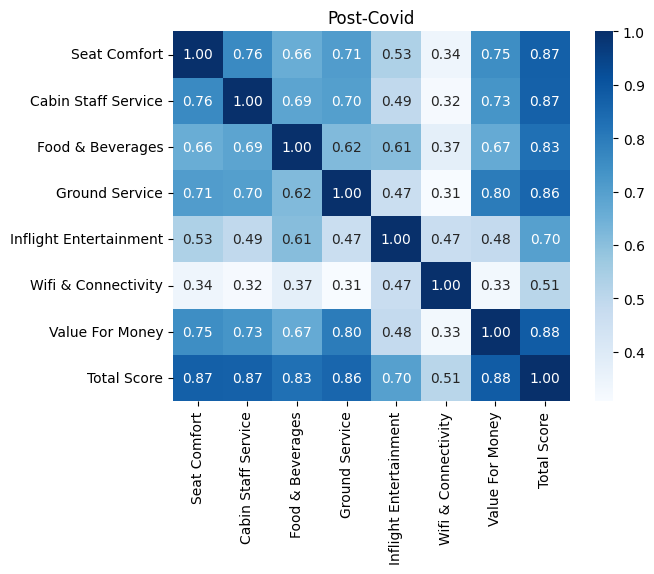

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = post_covid.corr()

# Draw heatmap
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f")

# Get the names of the columns
columns = corr.columns

# Iterate through the correlation matrix
for i in range(len(columns) -1):
    for j in range(i+1, len(columns)):  # Avoid duplicates and the diagonal
        col1 = columns[i]
        col2 = columns[j]
        correlation_coefficient = corr.iloc[i, j]
        print(f'{col1} and {col2} have a correlation coefficient of {correlation_coefficient:.2f}')

plt.title('Post-Covid')
plt.show()

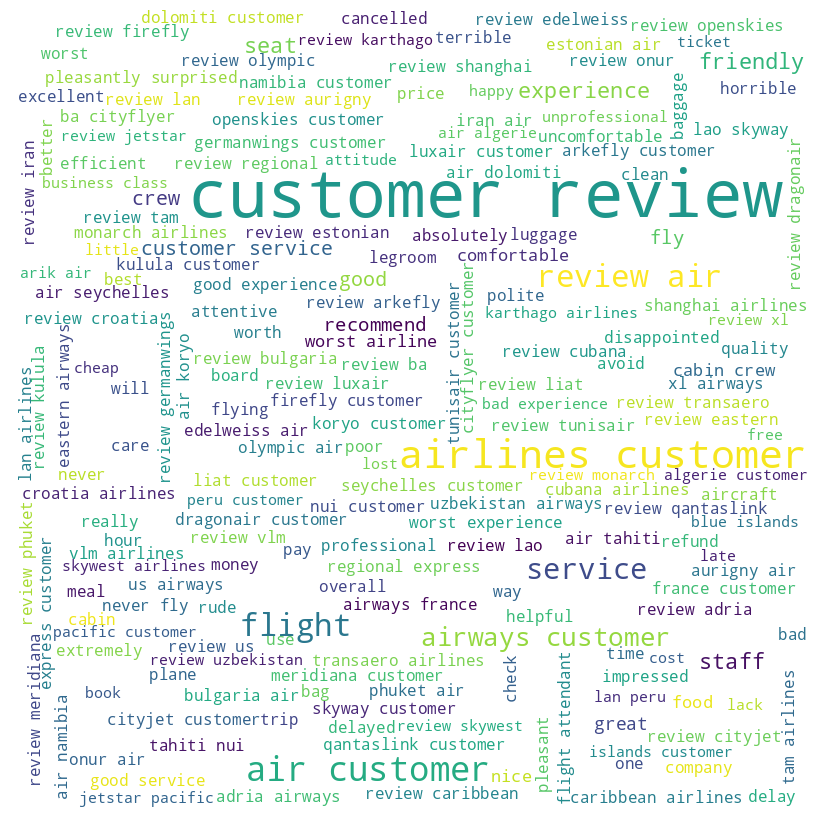

In [ ]:
# importing wordcloud
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
 
#for pre-covid
for val in pre_covid["Review_Title"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

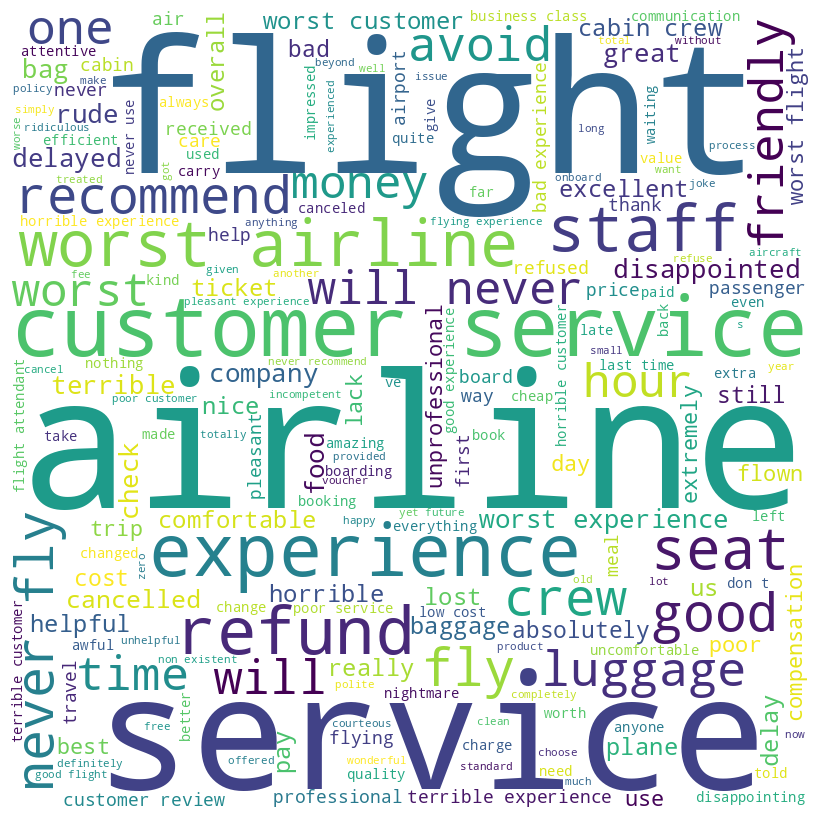

In [ ]:
comm_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in post_covid["Review_Title"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    token = val.split()
     
    # Converts each token into lowercase
    for i in range(len(token)):
        token[i] = token[i].lower()
     
    comm_words += " ".join(token)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comm_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

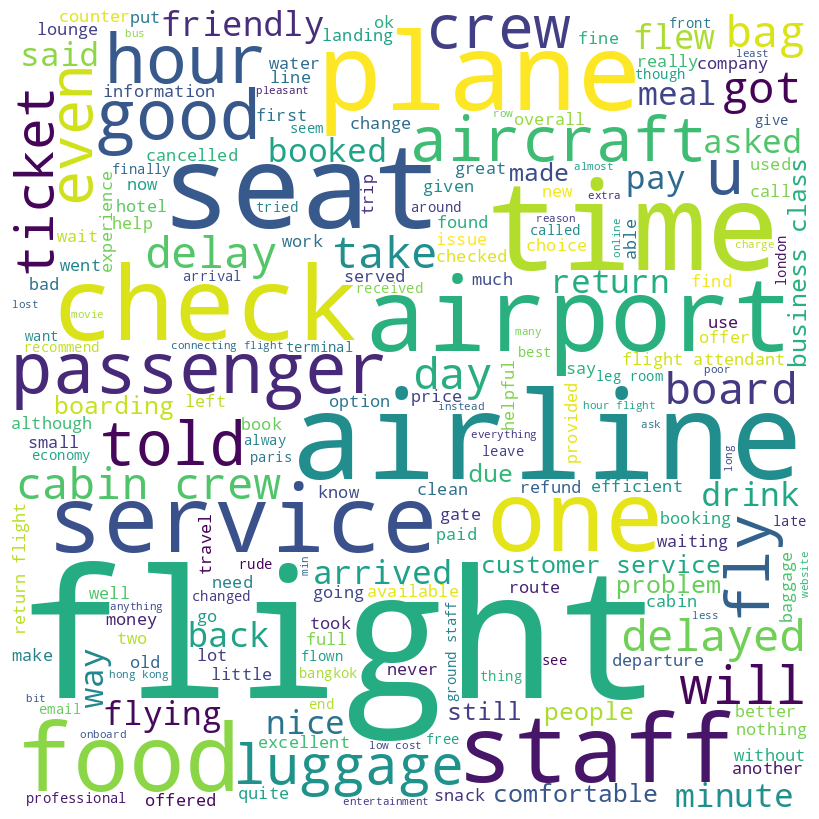

In [ ]:
# Word Cloud of Pre-Covid Reviews
review_words = ''
stopwords = set(STOPWORDS)
 
#for pre-covid
for val in pre_covid["Review"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    review_tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(review_tokens)):
        review_tokens[i] = review_tokens[i].lower()
     
    review_words += " ".join(review_tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(review_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

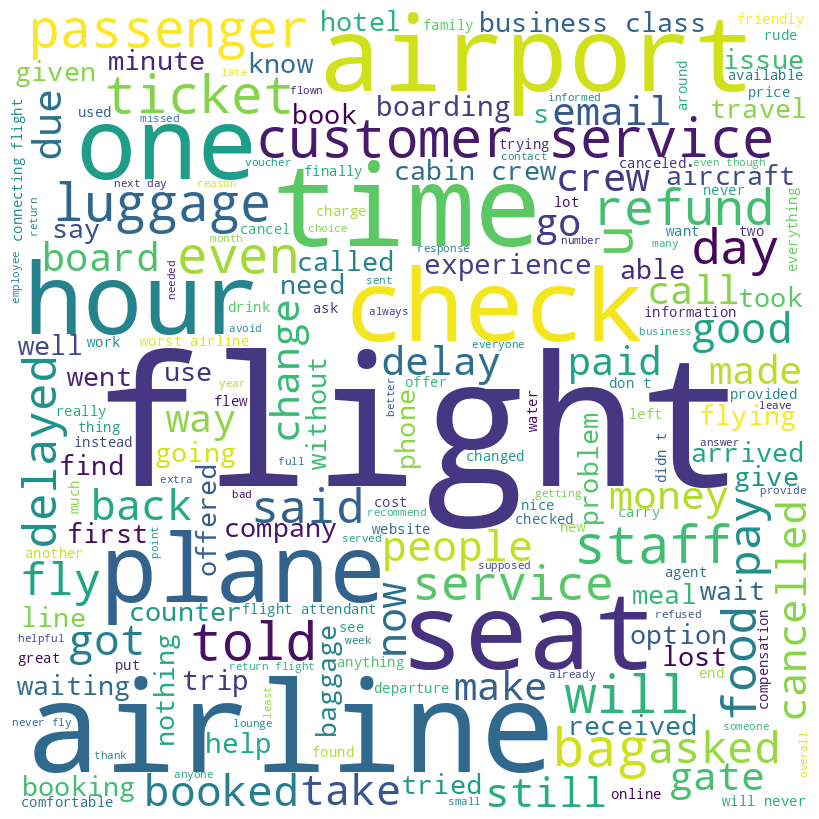

In [ ]:
reviews = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in post_covid["Review"]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    pc_token = val.split()
     
    # Converts each token into lowercase
    for i in range(len(pc_token)):
        pc_token[i] = pc_token[i].lower()
     
    reviews += " ".join(pc_token)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(reviews)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
pre_covid.hist(figsize=(10, 10), color='red')
plt.show()f

SyntaxError: invalid syntax (191021490.py, line 2)

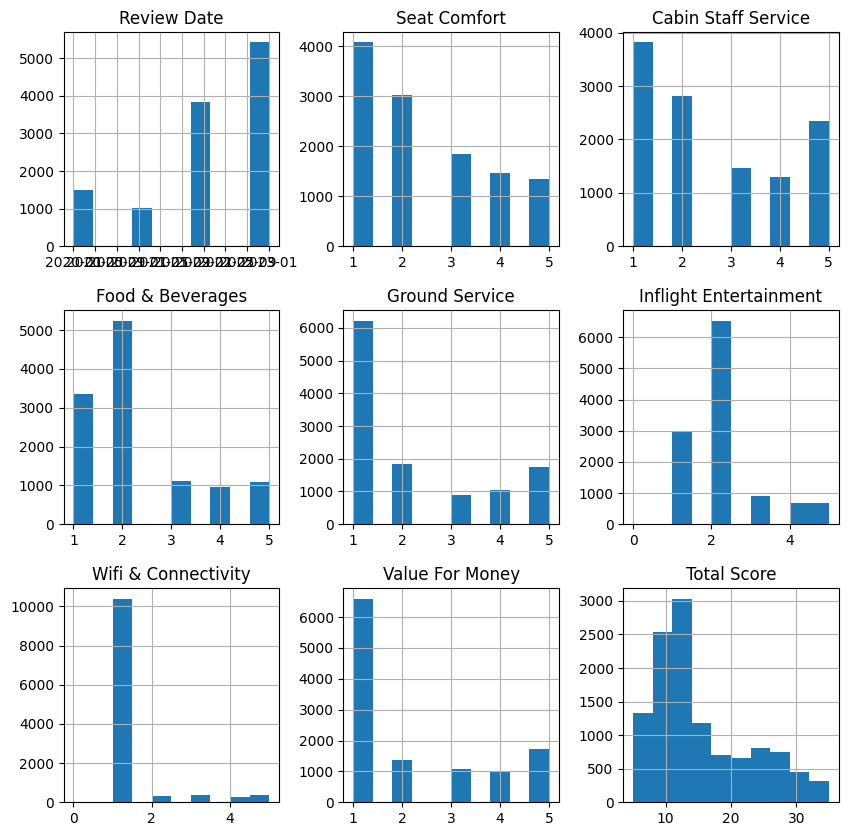

In [ ]:
post_covid.hist(figsize = (10,10));
plt.show()

# Determining Class Imbalance

In [ ]:
class_distribution = df['Recommended'].value_counts()

# Create a bar plot to visualize the class distribution
class_distribution.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e2d7258-be81-4486-bc85-234b0cc7a7d6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>